In [3]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [4]:
import sys
sys.path.append("../common")
import functions

# Q81 Hessianのコーナー検出

thorino.jpgにHessian(ヘシアン)のコーナー検出を行え。

コーナー検出とはエッジにおける角の点を検出することである。

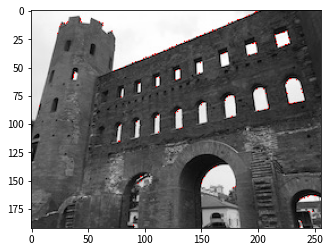

In [17]:
img = cv2.imread("thorino.jpg")
gray_img = functions.grayscale(img)
H,W = gray_img.shape
out = np.array((gray_img, gray_img, gray_img))
out = np.transpose(out, (1,2,0))

I_x = functions.sobel_filter(gray_img,"x")
I_y = functions.sobel_filter(gray_img,"y")

I2_x = I_x**2
I2_y = I_y**2
I_xy = I_x*I_y

Hes = np.zeros_like(gray_img)
for y in range(H):
    for x in range(W):
        Hes[y,x] = I2_x[y,x]*I2_y[y,x]-I_xy[y,x] **2

for y in range(H):
    for x in range(W):
        if Hes[y,x] == np.max(Hes[max(y-1, 0) : min(y+2, H), max(x-1, 0) : min(x+2, W)]) and Hes[y, x] > np.max(Hes) * 0.1:
            out[y,x] = [0,0,255]
            
out = out.astype(np.uint8)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB)) 
plt.show()

# Q82～83 Harrisのコーナー検出

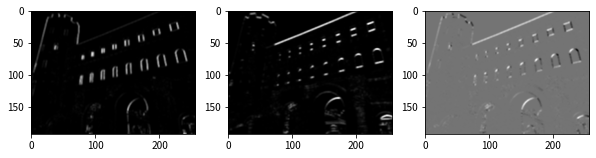

In [9]:
img = cv2.imread("thorino.jpg").astype(np.float32)
gray_img = functions.grayscale(img)
H,W = gray_img.shape

I2_x,I2_y,I_xy = functions.sobel_filter2(gray_img)

Ig2_x = functions.gaussian_filter(I2_x)
Ig2_y = functions.gaussian_filter(I2_y)
Ig_xy = functions.gaussian_filter(I_xy)

plt.figure(facecolor="white",figsize=(10,6))
plt.subplot(1,3,1)
plt.imshow(Ig2_x, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(Ig2_y, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(Ig_xy, cmap="gray")

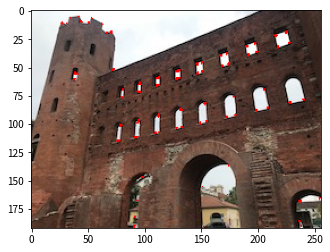

In [14]:
k=0.04
th = 0.1

R = np.zeros((H,W))
out = img.copy()

Hes = np.zeros_like(gray_img)
for y in range(H):
    for x in range(W):
        Hes[y,x] = I2_x[y,x]*I2_y[y,x]-I_xy[y,x] **2
        R[y,x] = Hes[y,x]-k* (I2_x[y,x]+I2_y[y,x])**2
        
out[R >= np.max(R) * th] = [0, 0, 255]
out = out.astype(np.uint8)

plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB)) 
plt.show()